In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

font = {'size':15}
matplotlib.rc('font', **font)

In [2]:
def default_result(filename):
    train_default = {}
    valid_default = {}
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            lines = line.strip('\n').split(' ')
            if lines[0] == 'train':
                train_default[lines[1]] = (float(lines[-3]), float(lines[-1]))
            elif lines[0] == 'valid':
                valid_default[lines[1]] = (float(lines[-3]), float(lines[-1]))
    return train_default, valid_default

In [3]:
def pruning_result(filename):
    train_pruning = {}
    valid_pruning = {}
    sparse_pruning = {}
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            lines = line.strip('\n').split(' ')
            if lines[0] == 'train':
                train_pruning[lines[1]] = (float(lines[4]), float(lines[6]))
            elif lines[0] == 'valid':
                valid_pruning[lines[1]] = (float(lines[4]), float(lines[6]))
            elif lines[0] == 'sparsity':
                sparsity = float(lines[3].replace('%',''))
                rate = lines[-1]
                sparse_pruning[i//4] = (sparsity, rate)
    return train_pruning, valid_pruning, sparse_pruning

In [4]:
def acc1_acc5(result_dict):
    acc1 = []
    acc5 = []
    for val in result_dict.values():
        acc1.append(val[0])
        acc5.append(val[1])
    return acc1, acc5

In [6]:
train_none, valid_none = default_result('../결과/kaggle_kernel_default.txt')

dirname = 'result_201202/'
train_pruning_05, valid_pruning_05, sparse_pruning_05 = pruning_result(dirname+'prune_05.txt')
train_pruning_06, valid_pruning_06, sparse_pruning_06 = pruning_result(dirname+'prune_06.txt')
train_pruning_07, valid_pruning_07, sparse_pruning_07 = pruning_result(dirname+'prune_07.txt')
train_pruning_08, valid_pruning_08, sparse_pruning_08 = pruning_result('result_201124/prune_08.txt')
train_pruning_09, valid_pruning_09, sparse_pruning_09 = pruning_result('result_201105/pruning_prune90.txt')

dirname = 'result_201124/'
train_decor_05, valid_decor_05 = default_result(dirname+'reg_5.txt')
train_decor_06, valid_decor_06 = default_result(dirname+'reg_6.txt')
train_decor_07, valid_decor_07 = default_result(dirname+'reg_7.txt')
train_decor_08, valid_decor_08 = default_result(dirname+'reg_8.txt')
train_decor_09, valid_decor_09 = default_result(dirname+'reg_9.txt')
train_decor_1,  valid_decor_1  = default_result('../결과/kaggle_kernel_decorrelation.txt')

dirname = 'result_201203/'
train_all_05_07, valid_all_05_07, sparse_all_05_07 = pruning_result(dirname+'prune_05_reg_07.txt')
train_all_05_08, valid_all_05_08, sparse_all_05_08 = pruning_result(dirname+'prune_05_reg_08.txt')
train_all_05_09, valid_all_05_09, sparse_all_05_09 = pruning_result(dirname+'prune_05_reg_09.txt')
train_all_06_07, valid_all_06_07, sparse_all_06_07 = pruning_result(dirname+'prune_06_reg_07.txt')
train_all_06_08, valid_all_06_08, sparse_all_06_08 = pruning_result(dirname+'prune_06_reg_08.txt')
# train_all_05_07, valid_all_05_07, sparse_all_05_07 = pruning_result(dirname+'prune_05_reg_07.txt')


In [7]:
train_none_acc1, train_none_acc5 = acc1_acc5(train_none)
valid_none_acc1, valid_none_acc5 = acc1_acc5(valid_none)

In [8]:
train_pruning_05_acc1, train_pruning_05_acc5 = acc1_acc5(train_pruning_05)
train_pruning_06_acc1, train_pruning_06_acc5 = acc1_acc5(train_pruning_06)
train_pruning_07_acc1, train_pruning_07_acc5 = acc1_acc5(train_pruning_07)
train_pruning_08_acc1, train_pruning_08_acc5 = acc1_acc5(train_pruning_08)
train_pruning_09_acc1, train_pruning_09_acc5 = acc1_acc5(train_pruning_09)

valid_pruning_05_acc1, valid_pruning_05_acc5 = acc1_acc5(valid_pruning_05)
valid_pruning_06_acc1, valid_pruning_06_acc5 = acc1_acc5(valid_pruning_06)
valid_pruning_07_acc1, valid_pruning_07_acc5 = acc1_acc5(valid_pruning_07)
valid_pruning_08_acc1, valid_pruning_08_acc5 = acc1_acc5(valid_pruning_08)
valid_pruning_09_acc1, valid_pruning_09_acc5 = acc1_acc5(valid_pruning_09)

sparse_pruning_05_per, sparse_pruning_05_num = acc1_acc5(sparse_pruning_05)
sparse_pruning_06_per, sparse_pruning_06_num = acc1_acc5(sparse_pruning_06)
sparse_pruning_07_per, sparse_pruning_07_num = acc1_acc5(sparse_pruning_07)
sparse_pruning_08_per, sparse_pruning_08_num = acc1_acc5(sparse_pruning_08)
sparse_pruning_09_per, sparse_pruning_09_num = acc1_acc5(sparse_pruning_09)

In [9]:
train_decor_05_acc1, train_decor_05_acc5 = acc1_acc5(train_decor_05)
train_decor_06_acc1, train_decor_06_acc5 = acc1_acc5(train_decor_06)
train_decor_07_acc1, train_decor_07_acc5 = acc1_acc5(train_decor_07)
train_decor_08_acc1, train_decor_08_acc5 = acc1_acc5(train_decor_08)
train_decor_09_acc1, train_decor_09_acc5 = acc1_acc5(train_decor_09)
train_decor_1_acc1,  train_decor_1_acc5  = acc1_acc5(train_decor_1)

valid_decor_05_acc1, valid_decor_05_acc5 = acc1_acc5(valid_decor_05)
valid_decor_06_acc1, valid_decor_06_acc5 = acc1_acc5(valid_decor_06)
valid_decor_07_acc1, valid_decor_07_acc5 = acc1_acc5(valid_decor_07)
valid_decor_08_acc1, valid_decor_08_acc5 = acc1_acc5(valid_decor_08)
valid_decor_09_acc1, valid_decor_09_acc5 = acc1_acc5(valid_decor_09)
valid_decor_1_acc1,  valid_decor_1_acc5  = acc1_acc5(valid_decor_1)

In [10]:
train_all_05_07_acc1, train_all_05_07_acc5 = acc1_acc5(train_all_05_07)
train_all_05_08_acc1, train_all_05_08_acc5 = acc1_acc5(train_all_05_08)
train_all_05_09_acc1, train_all_05_09_acc5 = acc1_acc5(train_all_05_09)
train_all_06_07_acc1, train_all_06_07_acc5 = acc1_acc5(train_all_06_07)
train_all_06_08_acc1, train_all_06_08_acc5 = acc1_acc5(train_all_06_08)

valid_all_05_07_acc1, valid_all_05_07_acc5 = acc1_acc5(valid_all_05_07)
valid_all_05_08_acc1, valid_all_05_08_acc5 = acc1_acc5(valid_all_05_08)
valid_all_05_09_acc1, valid_all_05_09_acc5 = acc1_acc5(valid_all_05_09)
valid_all_06_07_acc1, valid_all_06_07_acc5 = acc1_acc5(valid_all_06_07)
valid_all_06_08_acc1, valid_all_06_08_acc5 = acc1_acc5(valid_all_06_08)

sparse_all_05_07_per, sparse_all_05_07_num = acc1_acc5(sparse_all_05_07)
sparse_all_05_08_per, sparse_all_05_08_num = acc1_acc5(sparse_all_05_08)
sparse_all_05_09_per, sparse_all_05_09_num = acc1_acc5(sparse_all_05_09)
sparse_all_06_07_per, sparse_all_06_07_num = acc1_acc5(sparse_all_06_07)
sparse_all_06_08_per, sparse_all_06_08_num = acc1_acc5(sparse_all_06_08)

### Pruning

In [12]:
print(max(valid_none_acc1))
print(max(valid_pruning_05_acc1))
print(max(valid_pruning_06_acc1))

88.57
82.88
80.81


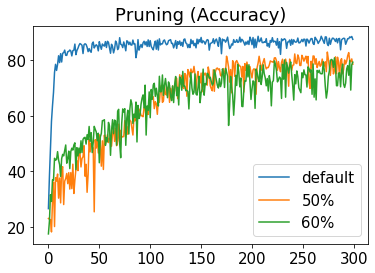

In [11]:
## pruning 결과 비교 (Acc1)
plt.plot(valid_none_acc1)
plt.plot(valid_pruning_05_acc1)
plt.plot(valid_pruning_06_acc1)
plt.legend(['default','50%','60%'])
plt.title('Pruning (Accuracy)')
plt.show()

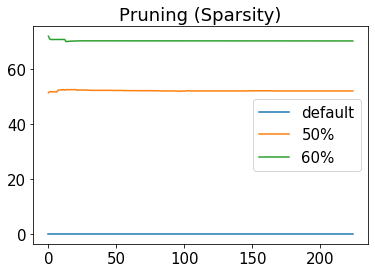

In [102]:
### pruning 희소성 비교
plt.plot([0]*225, 'C0')
plt.plot(sparse_pruning_05_per,'C1')
plt.plot(sparse_pruning_06_per,'C2')
plt.legend(['default', '50%','60%'])
plt.title('Pruning (Sparsity)')
plt.show()

### decor

In [14]:
print(max(valid_none_acc1))
print(max(valid_decor_07_acc1))
print(max(valid_decor_08_acc1))
print(max(valid_decor_09_acc1))

88.57
88.0
88.42
87.98


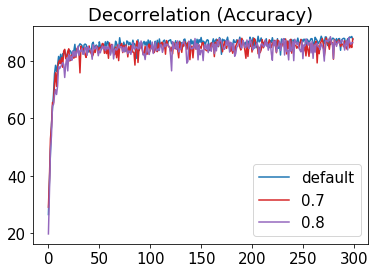

In [11]:
## decor 결과 비교 (Acc)
plt.plot(valid_none_acc1, 'C0')
plt.plot(valid_decor_07_acc1, 'C3')
plt.plot(valid_decor_08_acc1, 'C4')
# plt.plot(valid_decor_09_acc1, 'C5')
plt.legend(['default','0.7','0.8'])#, '0.9'])
plt.title('Decorrelation (Accuracy)')
plt.show()

### all

In [21]:
def chk_max(list1, list2):
    for i,v in enumerate(list1):
        if v == max(list1):
            try:
                print(i, v, list2[i])
            except:
                print(i, v, list2[-1])

In [23]:
chk_max(valid_all_05_07_acc1, sparse_all_05_07_per)
chk_max(valid_all_05_08_acc1, sparse_all_05_08_per)
chk_max(valid_all_05_09_acc1, sparse_all_05_09_per)
chk_max(valid_all_06_07_acc1, sparse_all_06_07_per)
chk_max(valid_all_06_08_acc1, sparse_all_06_08_per)

250 83.05 48.94
288 82.03 50.35
258 82.9 49.48
298 82.28 71.34
276 82.52 71.18


In [25]:
chk_max(sparse_all_05_07_per, valid_all_05_07_acc1)
chk_max(sparse_all_05_08_per, valid_all_05_08_acc1)
chk_max(sparse_all_05_09_per, valid_all_05_09_acc1)
chk_max(sparse_all_06_07_per, valid_all_06_07_acc1)
chk_max(sparse_all_06_08_per, valid_all_06_08_acc1)

4 49.17 32.69
11 50.7 22.05
22 49.97 43.29
2 72.09 28.4
2 71.31 33.67


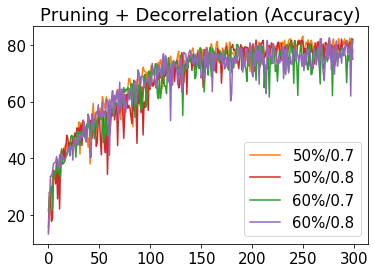

In [35]:
## 정확도 비교
plt.plot(valid_all_05_07_acc1, 'C1')
plt.plot(valid_all_05_08_acc1, 'C3')
plt.plot(valid_all_06_07_acc1, 'C2')
plt.plot(valid_all_06_08_acc1, 'C4')
plt.legend(['50%/0.7','50%/0.8', '60%/0.7', '60%/0.8'])#, '0.9'])
plt.title('Pruning + Decorrelation (Accuracy)')
plt.show()

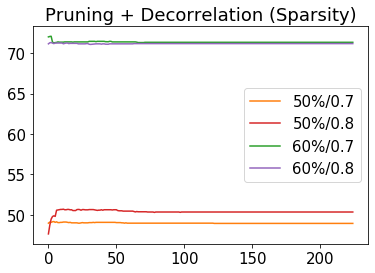

In [34]:
## 희소성 비교
plt.plot(sparse_all_05_07_per, 'C1')
plt.plot(sparse_all_05_08_per, 'C3')
plt.plot(sparse_all_06_07_per, 'C2')
plt.plot(sparse_all_06_08_per, 'C4')
plt.legend(['50%/0.7','50%/0.8', '60%/0.7', '60%/0.8'])
plt.title('Pruning + Decorrelation (Sparsity)')
plt.show()

### 전체 비교

In [40]:
chk_max(valid_none_acc1, [0]*300)
chk_max(valid_pruning_06_acc1, sparse_pruning_06_per)
chk_max(valid_decor_07_acc1, [0]*300)
chk_max(valid_all_06_07_acc1, sparse_all_06_07_per)

268 88.57 0
281 80.81 70.26
273 88.0 0
298 82.28 71.34


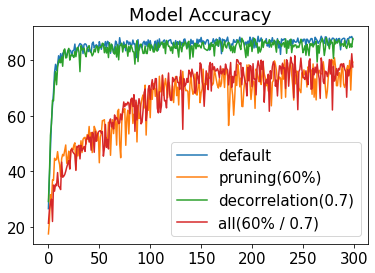

In [44]:
plt.plot(valid_none_acc1, 'C0')
plt.plot(valid_pruning_06_acc1, 'C1')
plt.plot(valid_decor_07_acc1, 'C2')
plt.plot(valid_all_06_07_acc1, 'C3')
plt.legend(['default','pruning(60%)', 'decorrelation(0.7)', 'all(60% / 0.7)'])#, '0.9'])
plt.title('Model Accuracy')
plt.show()